# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

# Details of version used
- sklearn.__version__ = 0.23.2
- seaborn.__version__ = 0.11.1
- numpy.__version__ = 1.19.2
- pandas.__version__ = 1.1.5
- matplotlib.__version__ = 3.3.2
- jupyter core     : 4.7.0
- jupyter-notebook : 6.3.0
- qtconsole        : 4.7.7
- ipython          : 7.19.0
- ipykernel        : 5.3.4
- jupyter client   : 6.1.7
- jupyter lab      : 2.2.6
- nbconvert        : 6.0.7
- ipywidgets       : 7.5.1
- nbformat         : 5.0.8
- traitlets        : 5.0.5

# NOTE: Some other libraries were imported at places as and when required

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv',delimiter=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',delimiter=';')

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
print(azdias.shape)
print(feat_info.shape)

(891221, 85)
(85, 4)


In [4]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [5]:
azdias.tail()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
891216,-1,3,2,5.0,1,4,2,5,4,4,...,3.0,2.0,0.0,0.0,1.0,2.0,3.0,NaN,NaN,NaN
891217,-1,2,1,4.0,3,3,3,2,2,3,...,1.0,3.0,3.0,2.0,4.0,5.0,3.0,4.0,6.0,5.0
891218,-1,2,2,4.0,2,4,2,5,4,3,...,4.0,2.0,0.0,0.0,1.0,3.0,4.0,2.0,2.0,3.0
891219,-1,1,1,3.0,1,5,3,5,5,5,...,1.0,4.0,3.0,1.0,5.0,1.0,1.0,4.0,7.0,5.0
891220,-1,4,1,1.0,4,2,5,2,1,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,4.0,5.0


In [6]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [7]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AGER_TYP               891221 non-null  int64  
 1   ALTERSKATEGORIE_GROB   891221 non-null  int64  
 2   ANREDE_KZ              891221 non-null  int64  
 3   CJT_GESAMTTYP          886367 non-null  float64
 4   FINANZ_MINIMALIST      891221 non-null  int64  
 5   FINANZ_SPARER          891221 non-null  int64  
 6   FINANZ_VORSORGER       891221 non-null  int64  
 7   FINANZ_ANLEGER         891221 non-null  int64  
 8   FINANZ_UNAUFFAELLIGER  891221 non-null  int64  
 9   FINANZ_HAUSBAUER       891221 non-null  int64  
 10  FINANZTYP              891221 non-null  int64  
 11  GEBURTSJAHR            891221 non-null  int64  
 12  GFK_URLAUBERTYP        886367 non-null  float64
 13  GREEN_AVANTGARDE       891221 non-null  int64  
 14  HEALTH_TYP             891221 non-nu

In [8]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [9]:
feat_info.tail()

,attribute,information_level,type,missing_or_unknown
80,PLZ8_HHZ,macrocell_plz8,ordinal,[-1]
81,PLZ8_GBZ,macrocell_plz8,ordinal,[-1]
82,ARBEIT,community,ordinal,"[-1,9]"
83,ORTSGR_KLS9,community,ordinal,"[-1,0]"
84,RELAT_AB,community,ordinal,"[-1,9]"


In [10]:
feat_info.describe()

,attribute,information_level,type,missing_or_unknown
count,85,85,85,85
unique,85,9,5,9
top,ANZ_HH_TITEL,person,ordinal,[-1]
freq,1,43,49,26


In [11]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   attribute           85 non-null     object
 1   information_level   85 non-null     object
 2   type                85 non-null     object
 3   missing_or_unknown  85 non-null     object
dtypes: object(4)
memory usage: 2.8+ KB


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [12]:
# Identify missing or unknown data values and convert them to NaNs.

In [13]:
already_nan = azdias.isna().sum().sum()
already_nan

4896838

In [14]:
total_entries = 891221*85
total_entries

75753785

In [15]:
percentage_nans_already = already_nan/total_entries * 100
percentage_nans_already

6.464149613118342

In [16]:
# checking if feature matrix contains any NaN value
feat_info['missing_or_unknown'].isna().sum()

0

In [17]:
#checking if the ordering of columns in azdias is same as rows in feat_info
col_names = pd.Series(azdias.columns.values)
col_names.compare(feat_info['attribute'])

,self,other


In [18]:
feat_info['missing_or_unknown'] = feat_info.missing_or_unknown.apply(lambda x: x[1:-1].split(','))

In [19]:
print(list(feat_info['missing_or_unknown']))

[['-1', '0'], ['-1', '0', '9'], ['-1', '0'], ['0'], ['-1'], ['-1'], ['-1'], ['-1'], ['-1'], ['-1'], ['-1'], ['0'], [''], [''], ['-1', '0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['-1', '0'], ['-1', '0'], ['0'], ['-1', '9'], ['-1', '9'], ['-1', '9'], ['-1', '9'], ['-1', '9'], ['-1', '9'], ['-1', '9'], ['-1', '9'], ['-1', '9'], ['-1', '9'], ['-1', '9'], ['-1', '9'], ['-1', '9'], ['-1', '9'], ['-1'], ['-1'], ['-1', '0'], ['-1'], ['-1', '9'], ['0'], [''], [''], ['-1', '0'], ['-1'], ['-1', '0'], ['-1', '0'], ['0'], [''], ['-1', '0'], [''], ['0'], ['-1'], ['-1'], ['-1', 'X'], ['XX'], ['-1', 'XX'], ['-1'], ['-1'], ['-1'], ['-1'], ['-1', '0'], ['-1', '0'], ['-1'], ['-1'], ['-1'], [''], ['-1', '0'], [''], [''], ['-1', '0'], [''], ['-1'], ['-1'], ['-1'], ['-1'], ['-1', '0'], ['-1'], ['-1'], ['-1', '9'], ['-1', '0'], ['-1', '9']]


In [20]:
for i in feat_info['missing_or_unknown']:
    if(len(i)!=0 and i[0]!=''):
        for j in range(len(i)):
            if(i[j]!='X' and i[j]!= 'XX'):
                i[j] = int(i[j])

In [21]:
feat_info['missing_or_unknown']

0        [-1, 0]
1     [-1, 0, 9]
2        [-1, 0]
3            [0]
4           [-1]
         ...    
80          [-1]
81          [-1]
82       [-1, 9]
83       [-1, 0]
84       [-1, 9]
Name: missing_or_unknown, Length: 85, dtype: object

In [22]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1, 0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [23]:
for i,columns in enumerate(col_names):
    azdias[columns] = azdias[columns].replace(feat_info.iloc[i,3],np.nan)

In [24]:
azdias

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891216,NaN,3.0,2,5.0,1,4,2,5,4,4,...,3.0,2.0,0.0,0.0,1.0,2.0,3.0,NaN,NaN,NaN
891217,NaN,2.0,1,4.0,3,3,3,2,2,3,...,1.0,3.0,3.0,2.0,4.0,5.0,3.0,4.0,6.0,5.0
891218,NaN,2.0,2,4.0,2,4,2,5,4,3,...,4.0,2.0,0.0,0.0,1.0,3.0,4.0,2.0,2.0,3.0
891219,NaN,1.0,1,3.0,1,5,3,5,5,5,...,1.0,4.0,3.0,1.0,5.0,1.0,1.0,4.0,7.0,5.0


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [25]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
nan_col_count = []
for column in col_names:
    nan_col_count.append(azdias[column].isna().sum())

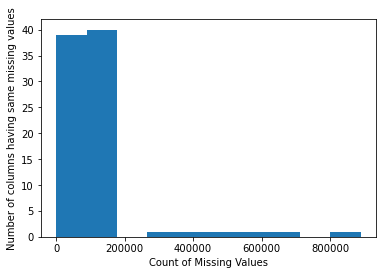

In [26]:
fig,ax = plt.subplots(1,1)
ax.hist(nan_col_count)
ax.set_xlabel('Count of Missing Values')
ax.set_ylabel('Number of columns having same missing values')
plt.show()

In [27]:
column_indices = list(range(85))

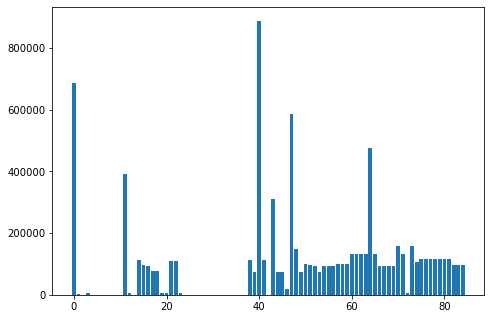

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(column_indices,nan_col_count)
plt.show()

In [29]:
too_many_missing_col = []
for i in range(85):
    if(nan_col_count[i] > 300000):
        too_many_missing_col.append(i)

In [30]:
too_many_missing_col

[0, 11, 40, 43, 47, 64]

# Investigate patterns in the amount of missing data in each column.
The pattern I observe in the histogram is most of the columns which have less missing data, occur in groups except few columns

In [31]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
azdias1 = azdias.drop(azdias.columns[too_many_missing_col],axis = 1)
feat_info1 = feat_info.drop(feat_info.index[too_many_missing_col],axis = 0)

In [32]:
azdias1.shape

(891221, 79)

In [33]:
feat_info1.shape

(79, 4)

In [34]:
print(col_names[too_many_missing_col])

0         AGER_TYP
11     GEBURTSJAHR
40        TITEL_KZ
43        ALTER_HH
47    KK_KUNDENTYP
64    KBA05_BAUMAX
dtype: object


#### Discussion 1.1.2: Assess Missing Data in Each Column
* From the histogram I observe most columns have missing values less than 200,000. The bar graph plotted later gives me an estimate that 6 columns have more than 300,000 missing values which is more than about 33%(300,000/891,221 * 100) of the 891,221 entries for each column.
<br>
* Regarding pattern in the amount of missing values , I observe atleast 2 columns(in general) have same missing values(number of columns having same amount of missing values occur in groups)
<br>
* The columns which were removed have indices and their names as:
<br>
    * 0    :        AGER_TYP<br>
    * 11   :  GEBURTSJAHR<br>
    * 40   :     TITEL_KZ<br>
    * 43   :     ALTER_HH<br>
    * 47   : KK_KUNDENTYP<br>
    * 64   : KBA05_BAUMAX<br>

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [35]:
# How much data is missing in each row of the dataset?
nan_row_count = list(azdias1.isnull().sum(axis=1))

In [36]:
print(pd.Series(nan_row_count))

0         43
1          0
2          0
3          7
4          0
          ..
891216     3
891217     4
891218     5
891219     0
891220     0
Length: 891221, dtype: int64


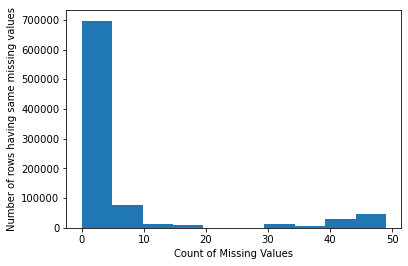

In [37]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
fig,ax = plt.subplots(1,1)
ax.hist(nan_row_count)
ax.set_xlabel('Count of Missing Values')
ax.set_ylabel('Number of rows having same missing values')
plt.show()

In [38]:
too_many_missing_row = []
for i in range(len(nan_row_count)):
    if(nan_row_count[i] >= 29):
        too_many_missing_row.append(i)

In [39]:
print(len(too_many_missing_row))

93172


In [40]:
azdias2 = azdias1.drop(azdias1.index[too_many_missing_row],axis = 0)

In [41]:
azdias2.shape

(798049, 79)

In [42]:
azdias1.shape[0] - 93172

798049

In [43]:
azdias_dropped_rows = azdias1.loc[too_many_missing_row]

In [44]:
azdias_dropped_rows.shape

(93172, 79)

In [45]:
too_many_missing_col

[0, 11, 40, 43, 47, 64]

In [46]:
# column indices which weren't dropped from azdias in azdias1
less_missing = []
for i in range(85):
    if i not in too_many_missing_col:
        less_missing.append(i)

In [47]:
print(less_missing)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]


In [48]:
# storing nan_counts of undropped columns and sorting them to get the columns with least missing values
less_nan_col_count = []
for i in range(len(less_missing)):
    less_nan_col_count.append((nan_col_count[less_missing[i]],less_missing[i]))

In [49]:
less_nan_col_count.sort()

In [50]:
print(less_nan_col_count)

[(0, 2), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 13), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 42), (2881, 1), (4854, 3), (4854, 12), (4854, 19), (4854, 20), (4854, 23), (4854, 72), (18348, 46), (73499, 39), (73499, 44), (73499, 45), (73499, 49), (73969, 53), (77792, 17), (77792, 18), (93148, 52), (93148, 54), (93148, 55), (93148, 56), (93155, 69), (93740, 66), (93740, 67), (93740, 68), (94572, 16), (97008, 51), (97274, 83), (97375, 82), (97375, 84), (97632, 15), (99352, 57), (99352, 58), (99352, 59), (99611, 50), (105800, 74), (108164, 22), (108315, 21), (111196, 14), (111196, 38), (111196, 41), (116515, 75), (116515, 76), (116515, 77), (116515, 78), (116515, 79), (116515, 80), (116515, 81), (133324, 60), (133324, 61), (133324, 62), (133324, 63), (133324, 65), (133324, 71), (147988, 48), (158064, 70), (158064, 73)]


In [51]:
def plotter(column_name):
    plt.subplot(1,2,1)
    sns.countplot(x=azdias_dropped_rows.index, data=azdias_dropped_rows.loc[:,column_name])
    plt.title('Rows with many NaNs')
    plt.subplot(1,2,2)
    sns.countplot(x=azdias2.index, data=azdias2.loc[:,column_name])
    plt.title('Rows with less NaNs')
    plt.suptitle('Comparison for column named:{} having {} missing values in this column'.format(column_name,azdias1[column_name].isna().sum()))
    plt.tight_layout()
    plt.show()

In [52]:
for i in range(10):
    print(azdias.columns[less_nan_col_count[i][1]])

ANREDE_KZ
FINANZ_MINIMALIST
FINANZ_SPARER
FINANZ_VORSORGER
FINANZ_ANLEGER
FINANZ_UNAUFFAELLIGER
FINANZ_HAUSBAUER
FINANZTYP
GREEN_AVANTGARDE
SEMIO_SOZ


In [53]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

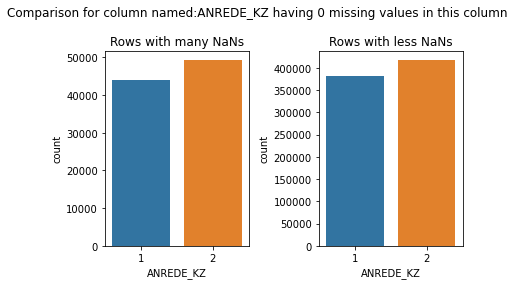

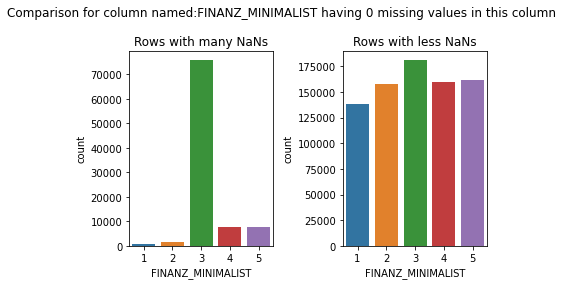

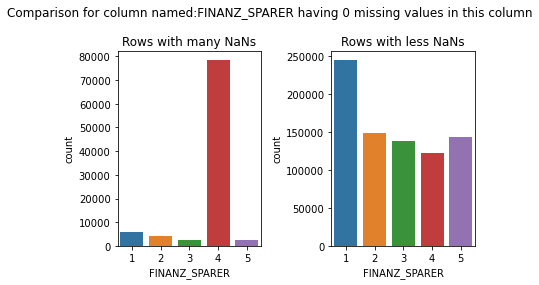

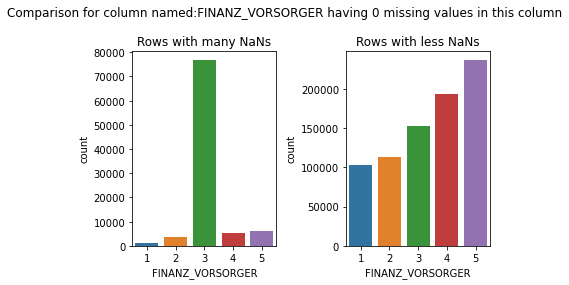

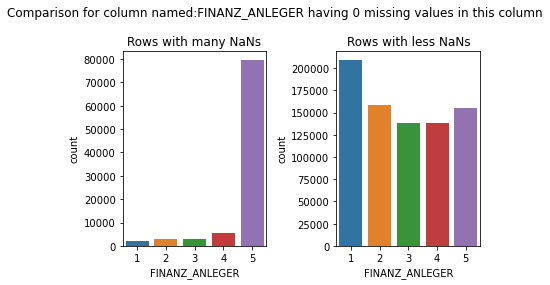

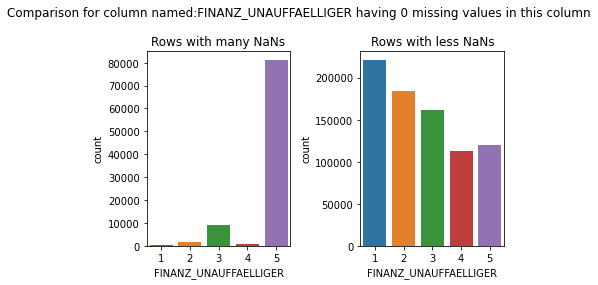

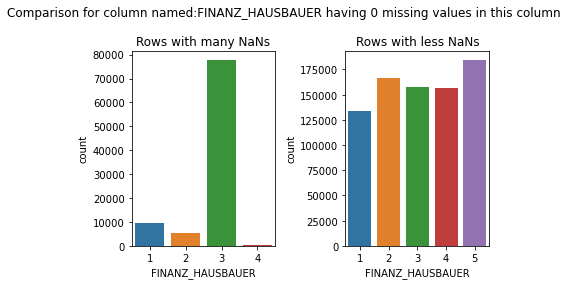

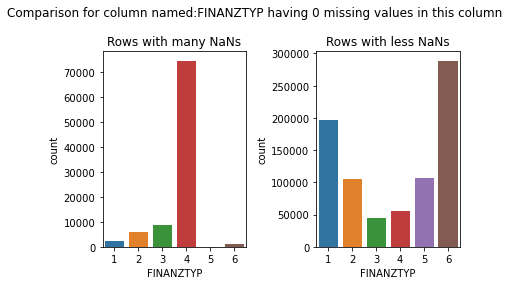

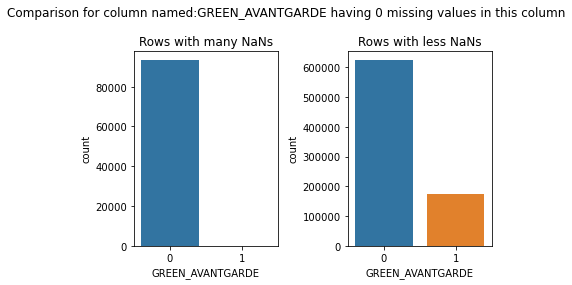

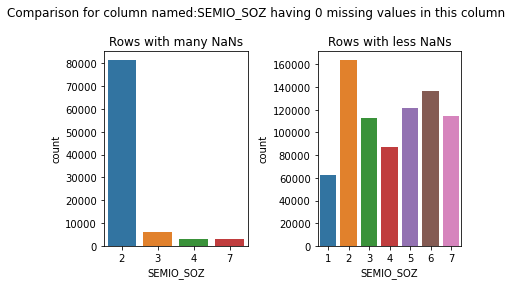

In [54]:
for i in range(10):
    plotter(azdias.columns[less_nan_col_count[i][1]])

#### Discussion 1.1.3: Assess Missing Data in Each Row
The distributions of values in the columns with less NaN values for rows with many and less NaN values:<br>
* In some case as in the column named: ANREDE_KZ is somewhat same ,
<br>
* For columns named: FINANZ_MINIMALIST and GREEN_AVANTGARDE have the same value occuring with maximum frequency
<br>
* And in **most other columns** the distribution **vary significantly** for many and less missing datas
<br>

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [55]:
dataTypes = feat_info.iloc[:,2].unique()

In [56]:
dataTypes = list(dataTypes)
print(dataTypes)

['categorical', 'ordinal', 'numeric', 'mixed', 'interval']


In [57]:
freq = [0,0,0,0,0]
for i in range(85):
    if feat_info.iloc[i,2] == dataTypes[0]:
        freq[0] = freq[0] + 1
    elif feat_info.iloc[i,2] == dataTypes[1]:
        freq[1] = freq[1] + 1
    elif feat_info.iloc[i,2] == dataTypes[2]:
        freq[2] = freq[2] + 1
    elif feat_info.iloc[i,2] == dataTypes[3]:
        freq[3] = freq[3] + 1
    elif feat_info.iloc[i,2] == dataTypes[4]:
        freq[4] = freq[4] + 1

In [58]:
# How many features are there of each data type?
#These are the feature counts in the original dataset and not in the modified data set
for t,f in zip(dataTypes,freq):
    print('{:11s} data type occurs {:2d} times'.format(t,f))

categorical data type occurs 21 times
ordinal     data type occurs 49 times
numeric     data type occurs  7 times
mixed       data type occurs  7 times
interval    data type occurs  1 times


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [59]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

In [60]:
feat_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1, 0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
...,...,...,...,...
80,PLZ8_HHZ,macrocell_plz8,ordinal,[-1]
81,PLZ8_GBZ,macrocell_plz8,ordinal,[-1]
82,ARBEIT,community,ordinal,"[-1, 9]"
83,ORTSGR_KLS9,community,ordinal,"[-1, 0]"


In [61]:
#cat_feat stands for categorical features and stores all categorical features in the ORIGINAL UNMODIFIED DATASET
cat_feat = []
for i in range(85):
    if feat_info['type'][i] == 'categorical':
        cat_feat.append(i)

In [62]:
col_names[cat_feat] #the column indices stored are based on the original dataframe

0             AGER_TYP
2            ANREDE_KZ
3        CJT_GESAMTTYP
10           FINANZTYP
12     GFK_URLAUBERTYP
13    GREEN_AVANTGARDE
17     LP_FAMILIE_FEIN
18     LP_FAMILIE_GROB
19      LP_STATUS_FEIN
20      LP_STATUS_GROB
21    NATIONALITAET_KZ
38         SHOPPER_TYP
39             SOHO_KZ
40            TITEL_KZ
41            VERS_TYP
42            ZABEOTYP
47        KK_KUNDENTYP
52         GEBAEUDETYP
55         OST_WEST_KZ
57     CAMEO_DEUG_2015
58      CAMEO_DEU_2015
dtype: object

In [63]:
for col in col_names[cat_feat]:
    print(feat_info.loc[feat_info['attribute'] == col,'type'])

0    categorical
Name: type, dtype: object
2    categorical
Name: type, dtype: object
3    categorical
Name: type, dtype: object
10    categorical
Name: type, dtype: object
12    categorical
Name: type, dtype: object
13    categorical
Name: type, dtype: object
17    categorical
Name: type, dtype: object
18    categorical
Name: type, dtype: object
19    categorical
Name: type, dtype: object
20    categorical
Name: type, dtype: object
21    categorical
Name: type, dtype: object
38    categorical
Name: type, dtype: object
39    categorical
Name: type, dtype: object
40    categorical
Name: type, dtype: object
41    categorical
Name: type, dtype: object
42    categorical
Name: type, dtype: object
47    categorical
Name: type, dtype: object
52    categorical
Name: type, dtype: object
55    categorical
Name: type, dtype: object
57    categorical
Name: type, dtype: object
58    categorical
Name: type, dtype: object


In [64]:
num_cat = []
for i in cat_feat:
    if i not in too_many_missing_col:
        arr = azdias.iloc[:,i].unique()
        arr = [x for x in arr if str(x) != 'nan']
        num_cat.append(len(arr))
        num_cat.sort()
num_cat

[2, 2, 2, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 9, 10, 11, 12, 44]

In [65]:
# binary stores binary categorical feature details 
# cat_feat_col_wise stands for categorical features column wise stores details regarding categorical features
# which have less than 7 categories
binary = []
cat_feat_col_wise = []
many_cats = []
for i in cat_feat:
    arr = azdias.iloc[:,i].unique()
    arr = [x for x in arr if str(x) != 'nan']
    arr.sort()
    if(len(arr) == 2):
        binary.append([i,arr])
    elif(len(arr)<=6):
        cat_feat_col_wise.append([i,arr,len(arr)])
    elif(len(arr)>6):
        many_cats.append(i)

In [66]:
col_names[many_cats]

12    GFK_URLAUBERTYP
17    LP_FAMILIE_FEIN
19     LP_STATUS_FEIN
52        GEBAEUDETYP
57    CAMEO_DEUG_2015
58     CAMEO_DEU_2015
dtype: object

In [67]:
cat_feat_col_wise

[[0, [1.0, 2.0, 3.0], 3],
 [3, [1.0, 2.0, 3.0, 4.0, 5.0, 6.0], 6],
 [10, [1, 2, 3, 4, 5, 6], 6],
 [18, [1.0, 2.0, 3.0, 4.0, 5.0], 5],
 [20, [1.0, 2.0, 3.0, 4.0, 5.0], 5],
 [21, [1.0, 2.0, 3.0], 3],
 [38, [0.0, 1.0, 2.0, 3.0], 4],
 [40, [1.0, 2.0, 3.0, 4.0, 5.0], 5],
 [42, [1, 2, 3, 4, 5, 6], 6],
 [47, [1.0, 2.0, 3.0, 4.0, 5.0, 6.0], 6]]

In [68]:
binary

[[2, [1, 2]],
 [13, [0, 1]],
 [39, [0.0, 1.0]],
 [41, [1.0, 2.0]],
 [55, ['O', 'W']]]

In [69]:
azdias_encoded = azdias2 #doing further changes in new dataframe

In [70]:
for bin_feat in binary:
    if bin_feat[0] not in too_many_missing_col:
        azdias_encoded[col_names[bin_feat[0]]].replace({bin_feat[1][0]:0,bin_feat[1][1]:1},inplace = True)

In [71]:
# col_cats stores categorical column names from cat_feat_col_wise which have less than 7 categories
col_cats = []
for i in range(len(cat_feat_col_wise)):
    col_cats.append(col_names[cat_feat_col_wise[i][0]])

In [72]:
col_cats

['AGER_TYP',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'LP_FAMILIE_GROB',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'TITEL_KZ',
 'ZABEOTYP',
 'KK_KUNDENTYP']

In [73]:
list(col_names[too_many_missing_col])

['AGER_TYP',
 'GEBURTSJAHR',
 'TITEL_KZ',
 'ALTER_HH',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX']

In [74]:
# showing no column having many categories was dropped earlier
already_dropped_many_cats = set.intersection(set(col_names[many_cats]),set(col_names[too_many_missing_col]))

In [75]:
# but some columns with less categories dropped earlier
already_dropped_col_cats = set.intersection(set(col_cats),set(col_names[too_many_missing_col]))

In [76]:
print(col_cats)
for category in already_dropped_col_cats:
    col_cats.remove(category)
print(col_cats)

['AGER_TYP', 'CJT_GESAMTTYP', 'FINANZTYP', 'LP_FAMILIE_GROB', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'TITEL_KZ', 'ZABEOTYP', 'KK_KUNDENTYP']
['CJT_GESAMTTYP', 'FINANZTYP', 'LP_FAMILIE_GROB', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP']


In [77]:
print(many_cats)
for category in already_dropped_many_cats:
    many_cats.remove(category)
print(many_cats)

[12, 17, 19, 52, 57, 58]
[12, 17, 19, 52, 57, 58]


# Kindly Note some categorical columns already dropped as they had many NaN values which I remove above from the col_cats which contain column names which are to be ONE_HOT_ENCODED by me <br>
# Similarly for many_cats

In [78]:
azdias_encoded = azdias_encoded.drop(col_names[many_cats],axis = 1)

In [79]:
# Re-encode categorical variable(s) to be kept in the analysis.

In [80]:
azdias_encoded = pd.get_dummies(azdias_encoded,columns = col_cats)

In [81]:
azdias_encoded

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6
1,1.0,1,1,5,2,5,4,5,0,3.0,...,0,0,0,1,0,0,0,0,1,0
2,3.0,1,1,4,1,2,3,5,1,3.0,...,0,0,1,0,0,0,0,0,1,0
3,4.0,1,4,2,5,2,1,2,0,2.0,...,0,1,0,0,0,0,1,0,0,0
4,3.0,0,4,3,4,1,3,2,0,3.0,...,0,0,1,0,0,0,0,1,0,0
5,1.0,1,3,1,5,2,2,5,0,3.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891216,3.0,1,1,4,2,5,4,4,0,3.0,...,0,0,0,1,0,0,0,1,0,0
891217,2.0,0,3,3,3,2,2,3,0,NaN,...,0,0,0,0,0,0,0,0,0,1
891218,2.0,1,2,4,2,5,4,3,0,1.0,...,0,0,1,0,0,0,0,1,0,0
891219,1.0,0,1,5,3,5,5,5,0,1.0,...,1,0,0,0,0,0,0,0,1,0


In [82]:
num_cat

[2, 2, 2, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 9, 10, 11, 12, 44]

In [83]:
azdias_encoded.shape

(798049, 101)

In [84]:
len(num_cat)

18

#### Discussion 1.2.1: Re-Encode Categorical Features
* There were a total of 21 categorical features in original dataset, **after dropping columns with many NaN 18 were left**<br>
* 12 of them having categories less than or equal to 6, 5 of them being binary.<br>
* The binary features were re-encoded to 0/1 format(**ASSUMING** original numeric encoding meant they may have some ordering according to numbers).<br>
* Other categorical features with less than or equal to 6 categories were one-hot encoded.<br>
* One-hot encoding adds up new columns equal to number of categories each categorical feature can take, for this reason to avoid too many columns other categorical features were not one-hot encoded but dropped.
<br>
* The final number of columns in the azdias_encoded dataframe is 101

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [85]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

### 1.18. PRAEGENDE_JUGENDJAHRE
Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)

In [86]:
azdias_encoded['PRAEGENDE_JUGENDJAHRE'].unique()

array([14., 15.,  8.,  3., 10., 11.,  5.,  9.,  6.,  4., nan,  2.,  1.,
       12., 13.,  7.])

In [87]:
def encode_gen(num):
    if num == 1 or num == 2:
        return 0
    elif num==3 or num==4:
        return 1
    elif num== 5 or num==6 or num==7:
        return 2
    elif num==8 or num==9:
        return 3
    elif num in [10,11,12,13]:
        return 4
    elif num==14 or num==15:
        return 5

In [88]:
azdias_encoded['generation'] = azdias_encoded['PRAEGENDE_JUGENDJAHRE'].apply(encode_gen)

In [89]:
azdias_encoded['generation'].unique()

array([ 5.,  3.,  1.,  4.,  2., nan,  0.])

In [90]:
def encode_move(num):
    if num in [1,3,5,8,10,12,14]:
        return 0
    elif num in [2,4,6,7,9,11,13,15]:
        return 1

In [91]:
azdias_encoded['movement'] = azdias_encoded['PRAEGENDE_JUGENDJAHRE'].apply(encode_move)

In [92]:
'PRAEGENDE_JUGENDJAHRE' in azdias_encoded.columns

True

In [93]:
azdias_encoded = azdias_encoded.drop(['PRAEGENDE_JUGENDJAHRE'],axis = 1)

In [94]:
'PRAEGENDE_JUGENDJAHRE' in azdias_encoded.columns

False

In [95]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

### 4.3. CAMEO_INTL_2015
German CAMEO: Wealth / Life Stage Typology, mapped to international code
- -1: unknown
- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement
- XX: unknown

In [96]:
for i in azdias_encoded['CAMEO_INTL_2015'].unique():
    print (i,type(i))

51 <class 'str'>
24 <class 'str'>
12 <class 'str'>
43 <class 'str'>
54 <class 'str'>
22 <class 'str'>
14 <class 'str'>
13 <class 'str'>
15 <class 'str'>
33 <class 'str'>
41 <class 'str'>
34 <class 'str'>
55 <class 'str'>
nan <class 'float'>
25 <class 'str'>
23 <class 'str'>
31 <class 'str'>
52 <class 'str'>
35 <class 'str'>
45 <class 'str'>
44 <class 'str'>
32 <class 'str'>


In [97]:
def encode_wealth(num):
    if(type(num) == str):
        num = int(num)
        return num//10

In [98]:
azdias_encoded['wealth'] = azdias_encoded['CAMEO_INTL_2015'].apply(encode_wealth)

In [99]:
azdias_encoded['wealth'].unique()

array([ 5.,  2.,  1.,  4.,  3., nan])

In [100]:
def encode_life(num):
    if(type(num) == str):
        num = int(num)
        return num%10

In [101]:
azdias_encoded['life_stage'] = azdias_encoded['CAMEO_INTL_2015'].apply(encode_life)

In [102]:
azdias_encoded['life_stage'].unique()

array([ 1.,  4.,  2.,  3.,  5., nan])

In [103]:
azdias_encoded = azdias_encoded.drop(['CAMEO_INTL_2015'],axis = 1)

In [104]:
feat_info1[feat_info1['type'] == 'mixed']

,attribute,information_level,type,missing_or_unknown
15,LP_LEBENSPHASE_FEIN,person,mixed,[0]
16,LP_LEBENSPHASE_GROB,person,mixed,[0]
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1, 0]"
56,WOHNLAGE,building,mixed,[-1]
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1, XX]"
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1, 0]"


In [105]:
other_mixed = []
for feat in feat_info1.index:
    if(col_names[feat] in azdias_encoded.columns and feat_info1.loc[feat,'type'] == 'mixed'):
        print(col_names[feat])
        other_mixed.append(col_names[feat])
        print(azdias_encoded[col_names[feat]].unique())

LP_LEBENSPHASE_FEIN
[21.  3. nan 32.  8.  2.  5. 10.  4.  6. 23. 12. 20.  1. 11. 25. 13. 18.
 31. 38. 35. 30.  7. 22. 14. 29. 24. 28. 37. 26. 39. 27. 36.  9. 34. 33.
 15. 40. 16. 19. 17.]
LP_LEBENSPHASE_GROB
[ 6.  1. nan 10.  2.  3.  5.  7. 12. 11.  9.  4.  8.]
WOHNLAGE
[4. 2. 7. 3. 5. 1. 8. 0.]
PLZ8_BAUMAX
[ 1.  2. nan  4.  5.  3.]


In [106]:
other_mixed

['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE', 'PLZ8_BAUMAX']

In [107]:
azdias_encoded = azdias_encoded.drop(other_mixed,axis = 1)

#### Discussion 1.2.2: Engineer Mixed-Type Features
* The mixed feature PRAEGENDE_JUGENDJAHRE was re-encoded into two sets of new features
<br>
* A unique number was assigned to each unique value in range of 0 to 5 for 'generation' feature
<br>
* and a unique number was assigned to each unique value in range of 0 to 1 for 'movement' feature.
<br>
* finally the original PRAEGENDE_JUGENDJAHRE column was dropped
<br>
* Similarly for CAMEO_INTL_2015 was re-encoded into two sets of new features
<br>
* A unique number was assigned to each unique value equal to the tens digit for 'wealth' feature
<br>
* and a unique number was assigned to each value equal to ones digit for 'life_stage' feature
<br>
* finally the original CAMEO_INTL_2015 column was dropped
<br>
* There were 4 other features with mixed values(in the modified datset) which were dropped for simplicity in the above cell
<br>
    The 4 dropped features were namely:'LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB','WOHNLAGE','PLZ8_BAUMAX'

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [108]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)
azdias_encoded.shape


(798049, 99)

### Do whatever you need to in order to ensure that the dataframe only contains
### the columns that should be passed to the algorithm functions.
### The other mixed features were dropped earlier and the re-encoded mixed features were dropped as well in the previous section
### I Think I have cleaned everything

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

## The cleaning function removes exactly those columns in input dataframe as in azdias dataframe so that same models can be used later without fitting again

In [110]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    
    for i,columns in enumerate(col_names):
        df[columns] = df[columns].replace(feat_info.iloc[i,3],np.nan)
        
        
    # remove selected columns and rows, ...
    df1 = df.drop(df.columns[too_many_missing_col],axis = 1)
    feat_info1 = feat_info.drop(feat_info.index[too_many_missing_col],axis = 0)
    
    nan_row_count = list(df1.isnull().sum(axis=1))
    too_many_missing_row = []
    for i in range(len(nan_row_count)):
        if(nan_row_count[i] >= 29):
            too_many_missing_row.append(i)
    df2 = df1.drop(df1.index[too_many_missing_row],axis = 0)
    df_dropped_rows = df1.loc[too_many_missing_row]
    
    
    # select, re-encode, and engineer column values.
    
    df_encoded = df2
    
    for bin_feat in binary:
        if bin_feat[0] not in too_many_missing_col:
            df_encoded[col_names[bin_feat[0]]].replace({bin_feat[1][0]:0,bin_feat[1][1]:1},inplace = True)
            
    df_encoded = df_encoded.drop(col_names[many_cats],axis = 1)
    df_encoded = pd.get_dummies(df_encoded,columns = col_cats)
    df_encoded['generation'] = df_encoded['PRAEGENDE_JUGENDJAHRE'].apply(encode_gen)
    df_encoded['movement'] = df_encoded['PRAEGENDE_JUGENDJAHRE'].apply(encode_move)
    df_encoded = df_encoded.drop(['PRAEGENDE_JUGENDJAHRE'],axis = 1)
    df_encoded['wealth'] = df_encoded['CAMEO_INTL_2015'].apply(encode_wealth)
    df_encoded['life_stage'] = df_encoded['CAMEO_INTL_2015'].apply(encode_life)
    df_encoded = df_encoded.drop(['CAMEO_INTL_2015'],axis = 1)
    df_encoded = df_encoded.drop(other_mixed,axis = 1)
    
    
    # Return the cleaned dataframe.
    
    return df_encoded

In [111]:
ndf = clean_data(azdias)

In [112]:
ndf.compare(azdias_encoded)

Empty DataFrame
Columns: []
Index: []

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [113]:
azdias_encoded.shape

(798049, 99)

In [114]:
count = azdias_encoded.shape[0] - azdias_encoded.dropna().shape[0]
count

174838

In [115]:
count/798049 * 100

21.90817857048878

In [116]:
from sklearn.impute import SimpleImputer

In [117]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
azdias_imputed = pd.DataFrame(imputer.fit_transform(azdias_encoded))
azdias_imputed.index = azdias_encoded.index
azdias_imputed.columns = azdias_encoded.columns

In [118]:
from sklearn.preprocessing import StandardScaler

In [122]:
# Apply feature scaling to the general population demographics data.
scaler_azdias = StandardScaler().fit(azdias_imputed)
azdias_scaled = scaler_azdias.transform(azdias_imputed)
azdias_scaled = pd.DataFrame(azdias_scaled)
azdias_scaled.columns = azdias_imputed.columns
azdias_scaled.index = azdias_imputed.index

In [123]:
azdias_scaled

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,generation,movement,wealth,life_stage
1,-1.766640,0.957914,-1.494591,1.537922,-1.040689,1.465968,0.958660,1.339302,-0.530411,1.096608,...,-0.427788,-0.207695,-0.739710,-0.592823,2.976105,-0.312172,1.172947,-0.530411,1.186222,-1.267043
2,0.200521,0.957914,-1.494591,0.864564,-1.766975,-0.570997,0.244132,1.339302,1.885332,1.096608,...,-0.427788,-0.207695,-0.739710,-0.592823,2.976105,-0.312172,1.172947,1.885332,-0.868233,0.761295
3,1.184101,0.957914,0.683148,-0.482153,1.138167,-0.570997,-1.184923,-0.791230,-0.530411,-0.256998,...,-0.427788,-0.207695,1.351882,-0.592823,-0.336010,-0.312172,-0.223452,-0.530411,-1.553051,-0.590930
4,0.200521,-1.043935,0.683148,0.191205,0.411881,-1.249985,0.244132,-0.791230,-0.530411,1.096608,...,-0.427788,-0.207695,-0.739710,1.686845,-0.336010,-0.312172,-0.223452,-0.530411,0.501404,0.085182
5,-1.766640,0.957914,-0.042765,-1.155512,1.138167,-0.570997,-0.470395,1.339302,-0.530411,1.096608,...,-0.427788,-0.207695,-0.739710,1.686845,-0.336010,-0.312172,-1.619852,-0.530411,1.186222,0.761295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891216,0.200521,0.957914,-1.494591,0.864564,-1.040689,1.465968,0.958660,0.629125,-0.530411,1.096608,...,-0.427788,-0.207695,-0.739710,1.686845,-0.336010,-0.312172,1.172947,-0.530411,0.501404,-1.267043
891217,-0.783059,-1.043935,-0.042765,0.191205,-0.314404,-0.570997,-0.470395,-0.081052,-0.530411,-0.256998,...,-0.427788,-0.207695,-0.739710,-0.592823,-0.336010,3.203364,0.474748,-0.530411,1.186222,-1.267043
891218,-0.783059,0.957914,-0.768678,0.864564,-1.040689,1.465968,0.958660,-0.081052,-0.530411,-1.610603,...,-0.427788,-0.207695,-0.739710,1.686845,-0.336010,-0.312172,1.172947,-0.530411,-0.868233,0.761295
891219,-1.766640,-1.043935,-1.494591,1.537922,-0.314404,1.465968,1.673188,1.339302,-0.530411,-1.610603,...,-0.427788,-0.207695,-0.739710,-0.592823,2.976105,-0.312172,1.172947,-0.530411,1.186222,-1.267043


### Discussion 2.1: Apply Feature Scaling
The imputer was used to replace unknown NaN values with median values.<br>
Nan Value rows weren't removed(but NaN values replaced) as about 21% of rows had some NaN value and removing them would lead to humongous loss of information<br>
Median was chosen over mean and most_frequent as mean would cause some decimals being introduced and most_frequent may distort the original distribution too much
<br>
Feature scaling as usual is done to remove the effects of the units being used.<br>
In particular Standard Scaler was used which made variance 1 and mean 0 for the columns<br>
(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [124]:
from sklearn.decomposition import PCA

In [125]:
# Apply PCA to the data.
pca_model = PCA(50)
azdias_PCA_50 = pca_model.fit_transform(azdias_scaled)

In [126]:
# Investigate the variance accounted for by each principal component.
# below function taken from Course provided helper module in PCA lesson
def pca_results(full_dataset, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)
def pca_results_no_graph(full_dataset, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

# Kindly note below column was not run again(to save time) while modifying code that's why cell execution number is different

,Explained Variance,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,...,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,generation,movement,wealth,life_stage
Dimension 1,0.1282,-0.1366,0.0119,-0.2220,0.1667,-0.1322,0.0965,0.0980,0.1425,-0.1072,...,-0.0921,-0.0452,-0.0514,0.0607,0.0991,0.0363,0.1231,-0.1072,0.1779,-0.1132
Dimension 2,0.1037,0.2166,0.0662,0.0323,-0.1981,0.2015,-0.1810,-0.2038,0.1325,-0.0377,...,-0.0922,-0.0456,0.2037,-0.0923,-0.0741,0.0278,-0.2219,-0.0377,0.0989,-0.0166
Dimension 3,0.0670,0.0396,-0.3512,0.1290,-0.0750,0.0707,-0.1651,-0.0724,-0.0382,0.0483,...,0.1029,-0.0318,-0.0117,-0.0708,-0.0316,0.0537,-0.0750,0.0483,0.0341,-0.0173
Dimension 4,0.0419,-0.0233,0.0601,0.0365,-0.0041,-0.0115,-0.1036,0.0683,-0.0656,0.3532,...,0.1029,0.1102,-0.0745,-0.0168,-0.0251,-0.0303,0.0306,0.3532,-0.0751,0.0354
Dimension 5,0.0294,0.0399,-0.0230,0.0884,-0.0151,-0.0235,0.0557,-0.1142,-0.1034,-0.0731,...,-0.0133,0.0700,-0.0354,0.1208,-0.1056,-0.0469,0.0275,-0.0731,0.0653,-0.0348
Dimension 6,0.0236,0.0592,-0.0214,-0.1115,0.0284,0.0903,0.0316,0.0334,0.1289,-0.0725,...,0.0059,-0.0629,0.0324,0.1039,-0.0734,-0.1003,-0.0265,-0.0725,0.0379,-0.0304
Dimension 7,0.0216,0.0061,-0.0437,0.1639,-0.0641,0.0363,-0.0908,-0.0453,-0.2659,-0.1056,...,-0.0670,0.1021,-0.0370,0.0206,-0.1135,0.1646,0.0107,-0.1056,0.0166,-0.0891
Dimension 8,0.0211,0.0208,0.0163,-0.0160,0.0136,-0.0762,0.0243,0.0018,-0.0169,-0.0192,...,0.0319,0.0981,-0.0330,-0.0641,0.0400,0.0026,0.0415,-0.0192,-0.0504,0.0376
Dimension 9,0.0197,-0.1241,0.0478,0.0339,-0.1080,0.1309,-0.0487,-0.2395,0.0843,-0.0131,...,0.0642,-0.0306,-0.0371,-0.0926,-0.1072,0.2588,-0.1151,-0.0131,-0.0107,0.0345
Dimension 10,0.0188,-0.0436,0.0054,0.0351,-0.0060,0.0856,-0.0470,0.0797,-0.0500,-0.0013,...,0.0282,-0.0736,0.0233,0.0587,-0.0364,-0.0754,-0.0551,-0.0013,-0.0581,-0.0060


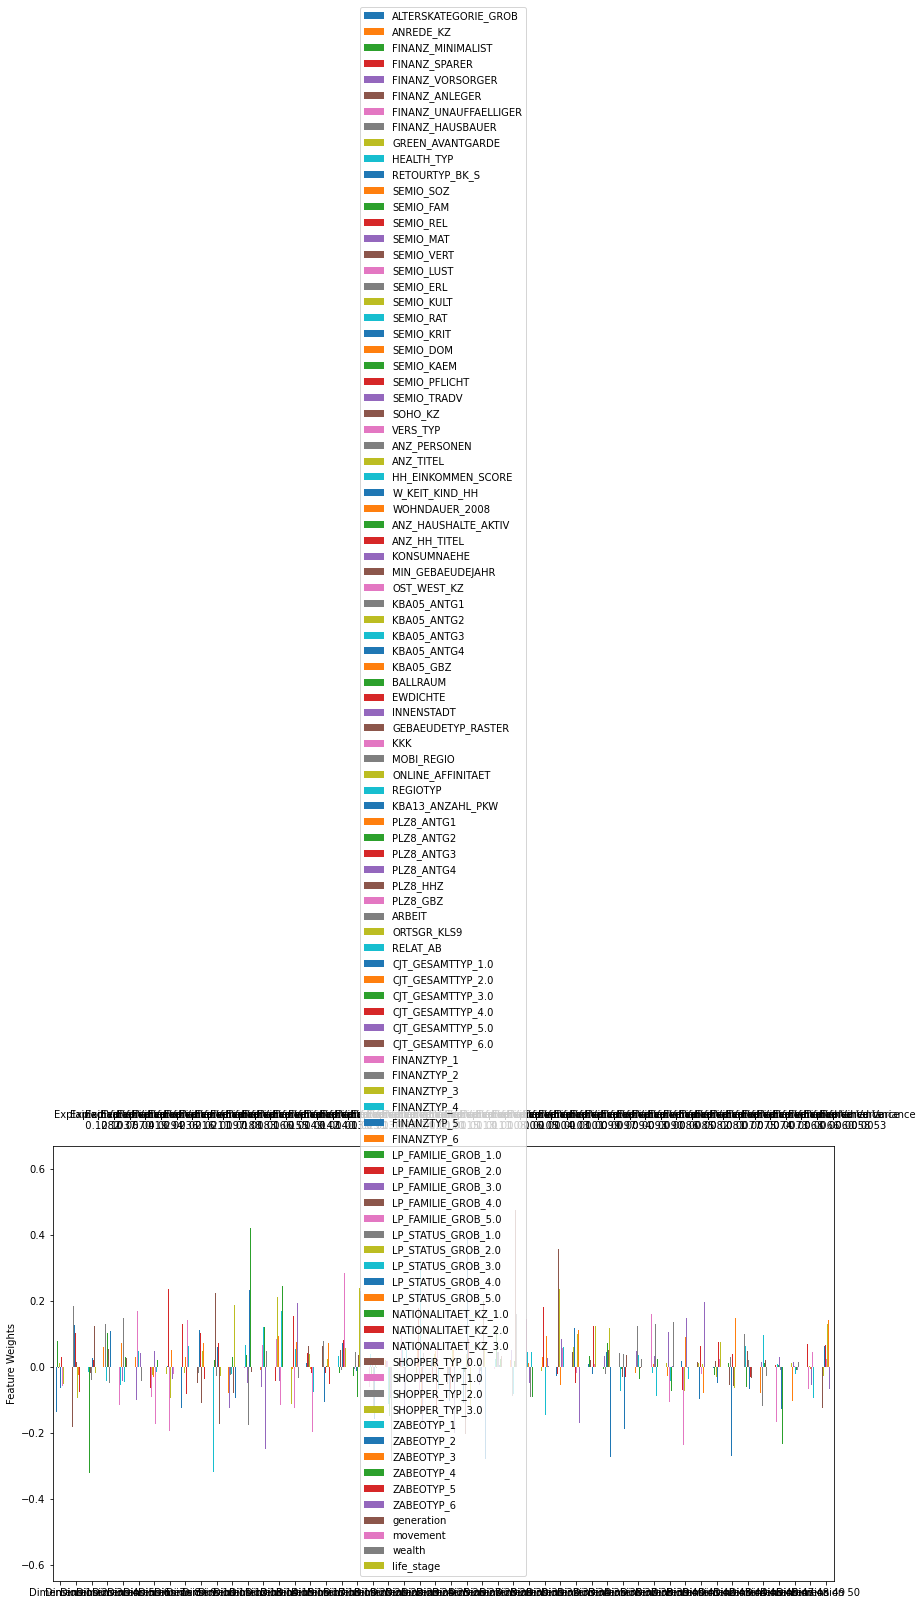

In [173]:
pca_results(azdias_scaled,pca_model)

# The below cell takes considerable amount of time to run so you may skip running it and use the inference i.e. the number of components to be retained

In [176]:
# pca_results(azdias_scaled,pca_model)
for comp in range(20, azdias_scaled.shape[1]):
    pca_model_temp = PCA(comp)
    azdias_pca_temp = pca_model_temp.fit_transform(azdias_scaled)
    comp_check = pca_results_no_graph(azdias_scaled, pca_model_temp)
    var_explained = comp_check['Explained Variance'].sum()
    print(var_explained)
    if var_explained > 0.80:
        break
        

num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(comp_check.shape[0],var_explained*100))

0.6193000000000001
0.6312
0.6431000000000001
0.6561000000000001
0.6666
0.6787
0.6890000000000001
0.7008
0.7113999999999999
0.7213999999999999
0.7327
0.7428
0.7529
0.7628
0.7729
0.7824000000000001
0.7919
0.8004
Using 37 components, we can explain 80.04% of the variability in the original data.


# This cell too wasn't re-run as it was related to previous cells

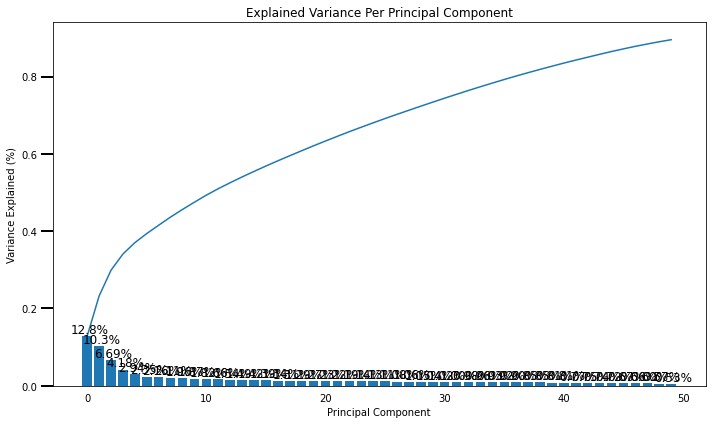

In [177]:
#Function Taken form PCA lesson of Course
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    plt.tight_layout()

scree_plot(pca_model)

# This cell plots the scree plot of the final PCA model of 37 components but wasn't run due to previous cells not been re-run

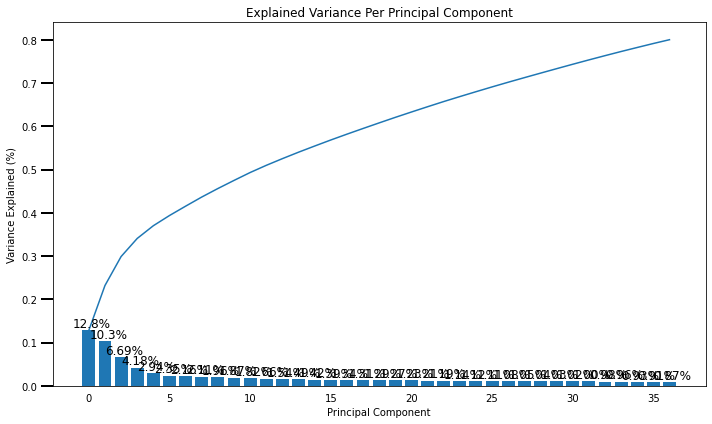

In [178]:
scree_plot(pca_model_temp)

In [127]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca_final_model = PCA(37)
azdias_PCA_final = pca_final_model.fit_transform(azdias_scaled)

### Discussion 2.2: Perform Dimensionality Reduction
* I chose 50 features in the intial PCA call and not all to avoid long running time<br>
* From ananlysis of variance distribution among features the top 37 features(linear combinations of all original features) account for more than 80% of the variance.<br>
* Number of features(37) was found by the variance explained by number of features ranging from 20 until I get 80% explained variance
* Hence for the next step I retain 37 features

In [128]:
azdias_PCA_final.shape

(798049, 37)

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [129]:
pca_final_model.components_.shape

(37, 99)

In [134]:
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def map_wt(dataframe,pca_model_instance,component_num):
    comps = pca_model_instance.components_
    col_final_names = list(dataframe.columns)
    wt_featName = []
    num = pca_model_instance.components_.shape[1]
    for i in range(num):
        wt_featName.append([comps[component_num][i],col_final_names[i]])
    wt_featName.sort(reverse = True)
    return wt_featName

In [135]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
w1 = map_wt(azdias_scaled,pca_final_model,0)
w1

[[0.20358587370697512, 'LP_STATUS_GROB_1.0'],
 [0.18754771938338782, 'HH_EINKOMMEN_SCORE'],
 [0.18736275385473172, 'PLZ8_ANTG3'],
 [0.18132510036118446, 'PLZ8_ANTG4'],
 [0.17790219070342256, 'wealth'],
 [0.16672299347389666, 'FINANZ_SPARER'],
 [0.16191666617726133, 'ORTSGR_KLS9'],
 [0.16056752334510807, 'EWDICHTE'],
 [0.1481474504989392, 'FINANZTYP_1'],
 [0.14246057713873758, 'FINANZ_HAUSBAUER'],
 [0.1307100029753879, 'SEMIO_PFLICHT'],
 [0.13052343925375778, 'KBA05_ANTG4'],
 [0.12869946529082327, 'PLZ8_ANTG2'],
 [0.12603817006073748, 'SEMIO_REL'],
 [0.12312885365406288, 'generation'],
 [0.12189362707324344, 'KBA05_ANTG3'],
 [0.11651681140361103, 'ARBEIT'],
 [0.11561980789127822, 'ANZ_HAUSHALTE_AKTIV'],
 [0.11089305717454825, 'RELAT_AB'],
 [0.10979026456353588, 'SEMIO_RAT'],
 [0.10566074415242498, 'SEMIO_TRADV'],
 [0.0991063039937822, 'ZABEOTYP_5'],
 [0.09797830080233458, 'FINANZ_UNAUFFAELLIGER'],
 [0.09654098007029968, 'FINANZ_ANLEGER'],
 [0.08342530203311359, 'SEMIO_MAT'],
 [0.0791577

In [136]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
w2 = map_wt(azdias_scaled,pca_final_model,1)
w2

[[0.21662538842333534, 'ALTERSKATEGORIE_GROB'],
 [0.20368492210816844, 'ZABEOTYP_3'],
 [0.20153988858768931, 'FINANZ_VORSORGER'],
 [0.18611368564888564, 'SEMIO_ERL'],
 [0.15421669784022776, 'SEMIO_LUST'],
 [0.15178999853213185, 'RETOURTYP_BK_S'],
 [0.13249648139737064, 'FINANZ_HAUSBAUER'],
 [0.12878600607725563, 'W_KEIT_KIND_HH'],
 [0.11126512882001316, 'PLZ8_ANTG3'],
 [0.10638685154936957, 'PLZ8_ANTG4'],
 [0.1034040416072101, 'EWDICHTE'],
 [0.10285295282285431, 'ORTSGR_KLS9'],
 [0.10062134422565011, 'CJT_GESAMTTYP_2.0'],
 [0.09892585506672628, 'wealth'],
 [0.09386868688483178, 'FINANZTYP_5'],
 [0.09325012645087404, 'SEMIO_KRIT'],
 [0.08936718460667234, 'SEMIO_KAEM'],
 [0.0867022709306628, 'HH_EINKOMMEN_SCORE'],
 [0.08599745815748244, 'KBA05_ANTG4'],
 [0.07969340760592507, 'ARBEIT'],
 [0.07646787236776931, 'PLZ8_ANTG2'],
 [0.07630137064920046, 'ANZ_HAUSHALTE_AKTIV'],
 [0.07507913772254385, 'FINANZTYP_2'],
 [0.07453118099541083, 'RELAT_AB'],
 [0.07131748659377307, 'LP_FAMILIE_GROB_1.0']

In [137]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
w3 = map_wt(azdias_scaled,pca_final_model,2)
w3

[[0.324124914009541, 'SEMIO_VERT'],
 [0.2572643873709446, 'SEMIO_SOZ'],
 [0.2561080335448145, 'SEMIO_FAM'],
 [0.2439958671228622, 'SEMIO_KULT'],
 [0.1421338419930555, 'FINANZTYP_5'],
 [0.12900155105128763, 'FINANZ_MINIMALIST'],
 [0.12422984422075593, 'SHOPPER_TYP_0.0'],
 [0.1029423877334224, 'ZABEOTYP_1'],
 [0.09718544721973056, 'SEMIO_REL'],
 [0.09114007866864757, 'RETOURTYP_BK_S'],
 [0.08508758301844326, 'W_KEIT_KIND_HH'],
 [0.07745577413634712, 'SEMIO_MAT'],
 [0.07074397389686216, 'FINANZ_VORSORGER'],
 [0.060707389065628774, 'ORTSGR_KLS9'],
 [0.06040683851815261, 'EWDICHTE'],
 [0.056677928096479216, 'PLZ8_ANTG3'],
 [0.05615091851702477, 'PLZ8_ANTG4'],
 [0.053742876769808864, 'ZABEOTYP_6'],
 [0.05276514051287778, 'SHOPPER_TYP_1.0'],
 [0.04826569737952693, 'movement'],
 [0.04826569737952692, 'GREEN_AVANTGARDE'],
 [0.04106749141941728, 'ARBEIT'],
 [0.0396573361434438, 'PLZ8_ANTG2'],
 [0.039634885947898796, 'ALTERSKATEGORIE_GROB'],
 [0.03893271558863154, 'RELAT_AB'],
 [0.038088366749810

## Kindly note below few columns show working done for Discussion2.3

In [138]:
azdias_encoded[['LP_STATUS_GROB_1.0','LP_STATUS_GROB_2.0','LP_STATUS_GROB_3.0','LP_STATUS_GROB_4.0','LP_STATUS_GROB_5.0']]

,LP_STATUS_GROB_1.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
5,0,1,0,0,0
...,...,...,...,...,...
891216,1,0,0,0,0
891217,1,0,0,0,0
891218,0,1,0,0,0
891219,1,0,0,0,0


In [139]:
azdias.loc[3,'LP_STATUS_GROB']

4.0

In [140]:
feat_info[feat_info['attribute'] == 'MOBI_REGIO']

,attribute,information_level,type,missing_or_unknown
71,MOBI_REGIO,region_rr1,ordinal,[]


In [141]:
feat_info[feat_info['attribute'] == 'ALTERSKATEGORIE_GROB']

,attribute,information_level,type,missing_or_unknown
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1, 0, 9]"


In [142]:
feat_info[feat_info['attribute'] == 'SEMIO_REL']

,attribute,information_level,type,missing_or_unknown
26,SEMIO_REL,person,ordinal,"[-1, 9]"


In [143]:
feat_info[feat_info['attribute'] == 'ANREDE_KZ']

,attribute,information_level,type,missing_or_unknown
2,ANREDE_KZ,person,categorical,"[-1, 0]"


In [144]:
feat_info[feat_info['attribute'] == 'SEMIO_KAEM']

,attribute,information_level,type,missing_or_unknown
35,SEMIO_KAEM,person,ordinal,"[-1, 9]"


### Discussion 2.3: Interpret Principal Components
#### For 1st Principal Component :
##### The top 2 features with most positive weight are :
* **LP_STATUS_GROB_1.0 with weight 0.20358585288416306**, the feature stands for low income earners, which having a large positive weight indicates(intuitively) their segregation from other rows of dataset as less income implies lesser quality of life.
* **HH_EINKOMMEN_SCORE with weight 0.18754773817666665**, the feature stands for household net income, and goes hand in hand with income of an individual hence it's positive weight(same sign as that of above feature) is justified.

##### The top 2 features with most negative weight are:
* **FINANZ_MINIMALIST with weight -0.22196350736007098**,the ordinal feature represents low financial interests with higher number representing even lesser interest hence negative weight is justified in opposition to positive weight for low income earners as low income people won't invest much in stocks.
* **MOBI_REGIO        with weight -0.20922553720355933**, the ordinal feature represents movement patterns, the high negative weight is justified as poor people travel less(so same negative sign with above feature)


#### For 2nd Principal Component :
##### The top 2 features with most positive weight are :
* **ALTERSKATEGORIE_GROB with weight 0.21662533713971197** , the ordinal feature represents age, higher the feature value higher the age.
* **ZABEOTYP_3 with weight 0.20368505370760134**, the feature represents fair supplied energy consumption typology, it having same sign as above feature makes sense as age increases people have metered electricity connections registered by their names at their homes(that's what I understood)

##### The top 2 features with most negative weight are:
* **generation with weight -0.22190150461809624**, the feature represents the decade of person's youth, it's negative sign is justified being opposite to the first positive sign above as higher the decade in which person was young lesser is his/her age
* **SEMIO_REL        with weight -0.205804067801318**, the ordinal feature represents religious affinity, larger value implies lesser affinity, it's negative sign indicates people with higher age have lesser religious affinity in Germany


#### For 3rd Principal Component :
##### The top 2 features with most positive weight are :
* **SEMIO_VERT with weight 0.3241254357154538**, the ordinal feature represents dreamfulness,higher value indicate lesser dreamfulness
* **SEMIO_SOZ with weight 0.2572629881495485**, the ordinal feature represents socially mindedness, higher value indicate lesser socially minded which makes sense as most people who are dreamful(have aims and aspirations in life) are quite socially minded and want to do something good for better of society.

##### The top 2 features with most negative weight are:
* **ANREDE_KZ with weight -0.3512078046537314**, the binary categorical feature tells gender, it's opposite sign with above features is difficult to interpret
* **SEMIO_KAEM        with weight -0.32140803945712537**, the ordinal feature tells about combative attitude, higher value lesser combative attitude and it makes sense as higher value of ANREDE_KZ means female(=1 and male = 0)  and females are in general less aggressive

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [155]:
from sklearn.cluster import KMeans

# CAUTION Re-Running below cell would take about 40 minutes, You may skip and use the inferred result i.e. numer of clusters

done for 2 clusters
done for 3 clusters
done for 4 clusters
done for 5 clusters
done for 6 clusters
done for 7 clusters
done for 8 clusters
done for 9 clusters
done for 10 clusters
done for 11 clusters
done for 12 clusters
done for 13 clusters
done for 14 clusters
done for 15 clusters
done for 16 clusters
done for 17 clusters
done for 18 clusters
done for 19 clusters
done for 20 clusters


Text(0.5, 1.0, 'scree plot')

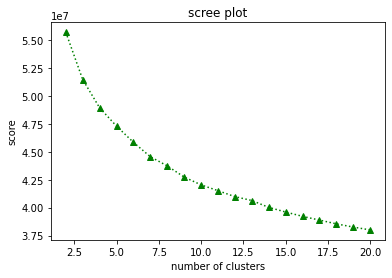

In [156]:
# Over a number of different cluster counts...
# run k-means clustering on the data and...    
# compute the average within-cluster distances.
scoresy = []
ksx = []
for i in range(1,20):
    local_mean = KMeans(i+1,random_state=10)
    local_model = local_mean.fit(azdias_PCA_final)
    local_labels = local_model.predict(azdias_PCA_final)
    scoresy.append(abs(KMeans.score(local_model,azdias_PCA_final)))
    ksx.append(i+1)
    print('done for {} clusters'.format(i+1))
plt.plot(ksx,scoresy,linestyle = ':',marker = '^',color = 'g')
plt.xlabel('number of clusters')
plt.ylabel('score')
plt.title('scree plot')

In [157]:
%matplotlib inline

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

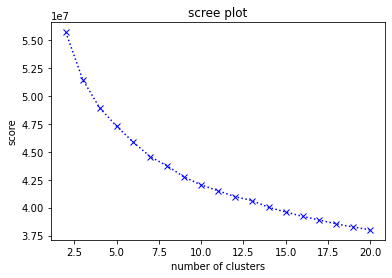

In [158]:
plt.plot(ksx,scoresy,linestyle = ':',marker = 'x',color = 'b')
plt.xlabel('number of clusters')
plt.ylabel('score')
plt.title('scree plot')
display(plt)

#### Investigate the change in within-cluster distance across number of clusters.
#### HINT: Use matplotlib's plot function to visualize this relationship.
**On observing the above scree plot by elbow method I claim 9 is the optimal number of clusters**

In [159]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
model_initialize = KMeans(9,random_state=10)
model_train = model_initialize.fit(azdias_PCA_final)
final_labels = model_train.predict(azdias_PCA_final)

In [163]:
count_class_freq = []
for i in range(9):
    count_class_freq.append(np.sum(final_labels == i))

In [164]:
count_class_freq

[106343, 89702, 84928, 97506, 98906, 86445, 97995, 70569, 65655]

### Discussion 3.1: Apply Clustering to General Population
- From the scree plot drawn over clusters from k = 1 to k = 20, I observe significant drops in score(average distances) upto k = 9(or k = 8 or k = 10,it's not too clear or sharp), so I select k = 9 with random state 10 as the optimum number of clusters
- The number of entries in each cluster is (106343, 89702, 84928, 97506, 98906, 86445, 97995, 70569, 65655) in order from cluster number 0 to cluster number 8

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [165]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv',delimiter=';')

In [166]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customers_clean = clean_data(customers)


In [167]:
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
customers_imputed = pd.DataFrame(imputer.fit_transform(customers_clean))
customers_imputed.index = customers_clean.index
customers_imputed.columns = customers_clean.columns

In [169]:
scaler_customers = StandardScaler().fit(customers_imputed)
customers_scaled = scaler_customers.transform(customers_imputed)
customers_scaled = pd.DataFrame(customers_scaled)
customers_scaled.columns = customers_imputed.columns
customers_scaled.index = customers_imputed.index

In [170]:
customers.shape

(191652, 85)

In [171]:
customers_clean.shape

(141722, 99)

In [172]:
customers_scaled.shape

(141722, 99)

In [173]:
customers_pca_final = pca_final_model.transform(customers_scaled)

In [174]:
customers_pca_final.shape

(141722, 37)

In [175]:
final_customer_labels = model_train.predict(customers_pca_final)

In [176]:
count_customers_class_freq = []
for i in range(9):
    count_customers_class_freq.append(np.sum(final_customer_labels == i))

In [177]:
count_customers_class_freq

[23670, 11056, 13705, 6614, 16364, 26278, 24169, 5232, 14634]

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [180]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
azdias_dropped_rows.shape

(93172, 79)

In [181]:
print(count_class_freq)
count_class_freq.insert(0,93172)
print(count_class_freq)
count_class_freq = (count_class_freq/sum(count_class_freq))*100
print(count_class_freq)
sum(count_class_freq)

[106343, 89702, 84928, 97506, 98906, 86445, 97995, 70569, 65655]
[93172, 106343, 89702, 84928, 97506, 98906, 86445, 97995, 70569, 65655]
[10.45442152 11.93228167 10.06506804  9.52939843 10.94072065 11.09780851
  9.69961435 10.9955892   7.91823801  7.36685962]


99.99999999999999

In [182]:
print(count_customers_class_freq)
count_customers_class_freq.insert(0,93172)
print(count_customers_class_freq)
count_customers_class_freq = (count_customers_class_freq/sum(count_customers_class_freq))*100
print(count_customers_class_freq)
sum(count_customers_class_freq)

[23670, 11056, 13705, 6614, 16364, 26278, 24169, 5232, 14634]
[93172, 23670, 11056, 13705, 6614, 16364, 26278, 24169, 5232, 14634]
[39.66555127 10.07688574  4.70680392  5.83454665  2.81573816  6.96654661
 11.18717379 10.28932199  2.22738767  6.23004419]


100.0

In [183]:
count_class_freq = pd.DataFrame(count_class_freq)

In [184]:
count_class_freq.columns = ['Percentage People']

In [185]:
count_class_freq['Clusters'] = range(-1,9)

In [186]:
count_class_freq

,Percentage People,Clusters
0,10.454422,-1
1,11.932282,0
2,10.065068,1
3,9.529398,2
4,10.940721,3
5,11.097809,4
6,9.699614,5
7,10.995589,6
8,7.918238,7
9,7.366860,8


In [187]:
count_customers_class_freq = pd.DataFrame(count_customers_class_freq)

In [188]:
count_customers_class_freq.columns = ['Percentage People']

In [189]:
count_customers_class_freq['Clusters'] = range(-1,9)

In [190]:
count_customers_class_freq

,Percentage People,Clusters
0,39.665551,-1
1,10.076886,0
2,4.706804,1
3,5.834547,2
4,2.815738,3
5,6.966547,4
6,11.187174,5
7,10.289322,6
8,2.227388,7
9,6.230044,8


In [191]:
count_class_freq['Type'] = 'General'
count_customers_class_freq['Type'] = 'Customers'

In [192]:
final_df = pd.concat([count_class_freq,count_customers_class_freq],keys=['General','Customers'])

In [193]:
final_df

Percentage People  Clusters       Type
General   0          10.454422        -1    General
          1          11.932282         0    General
          2          10.065068         1    General
          3           9.529398         2    General
          4          10.940721         3    General
          5          11.097809         4    General
          6           9.699614         5    General
          7          10.995589         6    General
          8           7.918238         7    General
          9           7.366860         8    General
Customers 0          39.665551        -1  Customers
          1          10.076886         0  Customers
          2           4.706804         1  Customers
          3           5.834547         2  Customers
          4           2.815738         3  Customers
          5           6.966547         4  Customers
          6          11.187174         5  Customers
          7          10.289322         6  Customers
          8           2.227388         7  Customers
          9           6.230044         8  Customers

In [194]:
df_final_group = final_df.groupby(['Clusters','Type'])

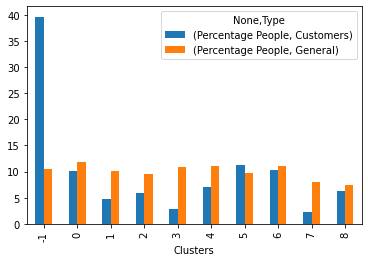

In [195]:
df_final_group_plot = df_final_group.sum().unstack('Type').plot(kind = 'bar')

## The code for plotting above double bar graph is referenced from : [HERE](https://stackoverflow.com/questions/31258134/how-to-plot-two-dataframe-on-same-graph-for-comparison)

# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?


In [244]:
# Cluster 5 is clearly an overrepresented cluster by the customers dataset
# I am considering cluster labelled 5 as overrepresented as the cluster labelled -1 contained many nan values
# now I find the relevant feature values associated with that cluster

In [309]:
model_train.cluster_centers_?

I struggled a lot on which command in particular should be used and ended up on this question's link of Knowledge:
 [https://knowledge.udacity.com/questions/99950](https://knowledge.udacity.com/questions/99950)

In [312]:
c5 = model_train.cluster_centers_[6] # as -1 cluster is at the beginning(index 0) hence for cluster 5 the location in array will be 6

In [313]:
len(c5)

37

In [314]:
c5_inverse_pca = pca_final_model.inverse_transform(c5)
c5_inverse_pca.shape

(99,)

In [315]:
c5_inverse_scaler = scaler_customers.inverse_transform(c5_inverse_pca)

In [316]:
c5_inverse_scaler.shape

(99,)

In [317]:
type(c5_inverse_scaler)

numpy.ndarray

In [318]:
c5_inverse_scaler = pd.Series(c5_inverse_scaler)
c5_inverse_scaler.index = customers_clean.columns

In [322]:
c5_inverse_scaler

ALTERSKATEGORIE_GROB    3.908084
ANREDE_KZ               0.304895
FINANZ_MINIMALIST       5.373762
FINANZ_SPARER           0.781005
FINANZ_VORSORGER        5.104789
                          ...   
ZABEOTYP_6             -0.002874
generation              1.150082
movement                1.469749
wealth                  1.416664
life_stage              4.026668
Length: 99, dtype: float64

In [327]:
c5_inverse_scaler.sort_values(ascending=False)

MIN_GEBAEUDEJAHR       1992.640193
KBA13_ANZAHL_PKW        740.278840
WOHNDAUER_2008            9.037590
SEMIO_LUST                6.275234
SEMIO_VERT                5.599968
                          ...     
KBA05_ANTG4              -0.068575
FINANZTYP_1              -0.071746
KBA05_ANTG3              -0.099372
LP_STATUS_GROB_1.0       -0.124124
ANZ_HAUSHALTE_AKTIV      -1.248695
Length: 99, dtype: float64

# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

In [297]:
c3 = model_train.cluster_centers_[4] # as -1 named cluster is at the start(index 0) so 3 named cluster at index 4

In [298]:
c3_inverse_pca = pca_final_model.inverse_transform(c3)

In [299]:
c3.shape

(37,)

In [304]:
c3_inverse_pca.shape

(99,)

In [300]:
c3_inverse_scaler = scaler_customers.inverse_transform(c3_inverse_pca)

In [301]:
c3_inverse_scaler.shape

(99,)

In [302]:
c3_inverse_scaler = pd.Series(c3_inverse_scaler)
c3_inverse_scaler.index = azdias_scaled.columns

In [324]:
c3_inverse_scaler

ALTERSKATEGORIE_GROB    4.041379
ANREDE_KZ               0.752267
FINANZ_MINIMALIST       3.900623
FINANZ_SPARER           0.951599
FINANZ_VORSORGER        5.099118
                          ...   
ZABEOTYP_6              0.030670
generation              0.914799
movement                0.331255
wealth                  3.470562
life_stage              3.177178
Length: 99, dtype: float64

In [326]:
c3_inverse_scaler.sort_values(ascending=False)

MIN_GEBAEUDEJAHR        1992.421031
KBA13_ANZAHL_PKW         601.436827
ANZ_HAUSHALTE_AKTIV       11.706923
WOHNDAUER_2008             8.845439
SEMIO_ERL                  6.695592
                           ...     
ZABEOTYP_5                -0.011269
NATIONALITAET_KZ_2.0      -0.013944
ZABEOTYP_2                -0.015455
FINANZTYP_4               -0.023075
FINANZTYP_3               -0.032304
Length: 99, dtype: float64

## Below list (dataframe wouldn't print all features that's why I chose list) helps compare the feature values between the potential customers cluster and the cluster of people who aren't potential customers

In [334]:
print(list(zip(c3_inverse_scaler.index,c5_inverse_scaler > c3_inverse_scaler)))

[('ALTERSKATEGORIE_GROB', False), ('ANREDE_KZ', False), ('FINANZ_MINIMALIST', True), ('FINANZ_SPARER', False), ('FINANZ_VORSORGER', True), ('FINANZ_ANLEGER', False), ('FINANZ_UNAUFFAELLIGER', True), ('FINANZ_HAUSBAUER', False), ('GREEN_AVANTGARDE', True), ('HEALTH_TYP', True), ('RETOURTYP_BK_S', False), ('SEMIO_SOZ', True), ('SEMIO_FAM', True), ('SEMIO_REL', True), ('SEMIO_MAT', True), ('SEMIO_VERT', True), ('SEMIO_LUST', False), ('SEMIO_ERL', False), ('SEMIO_KULT', True), ('SEMIO_RAT', False), ('SEMIO_KRIT', False), ('SEMIO_DOM', False), ('SEMIO_KAEM', False), ('SEMIO_PFLICHT', True), ('SEMIO_TRADV', True), ('SOHO_KZ', False), ('VERS_TYP', False), ('ANZ_PERSONEN', True), ('ANZ_TITEL', True), ('HH_EINKOMMEN_SCORE', False), ('W_KEIT_KIND_HH', False), ('WOHNDAUER_2008', True), ('ANZ_HAUSHALTE_AKTIV', False), ('ANZ_HH_TITEL', False), ('KONSUMNAEHE', True), ('MIN_GEBAEUDEJAHR', True), ('OST_WEST_KZ', True), ('KBA05_ANTG1', True), ('KBA05_ANTG2', False), ('KBA05_ANTG3', False), ('KBA05_ANTG

### Discussion 3.3: Compare Customer Data to Demographics Data
- It can be observed from the double-bar graph drawn cluster -1(The one which consists of dropped rows of many missing values) and cluster 5 were overrepresented in the customers dataset.
- However only cluster 5 was analysed to find potential customers for the company as cluster -1 contained many missing values so it might be risky to take a decision with less information
- Cluster 5(potential customers) data when analyzed using inverse pca transform followed by inverse scaler transform gave some of the feature values as:
    - ALTERSKATEGORIE_GROB    3.908084 ,this feature represents age predicted by name analysis and the value close to 4 suggests old people with age > 60 are potential customers
    - ANREDE_KZ               0.304895,  this binary categorical feature(scaled from (1,2) to (0,1)) represents gender,with 0 representing males, hence this company seems to have a big male customer base
    - KBA13_ANZAHL_PKW        740.278840, this feature represents number of cars in the locality (PLZ8) region, people in regions with around 740 cars are potential customers
    - wealth                  1.416664, this feature represents how wealthy a family is and was obtained from mixed feature CAMEO_INTL_2015, lower value indicates richer household, hence customers who are wealthy are potential customers
    - life_stage              4.026668, this feature too represents age higher value indicates older people which agrees with the feature ALTERSKATEGORIE_GROB discussed above. CLoseness to 4 in particular means Older Families and Mature Couples are potential customers
- Cluster 3 data when aanalyzed in a similar way gave below features(these people are not potential customers):
    - ALTERSKATEGORIE_GROB    4.041379, this feature value also suggests old people with age > 60 are not potential customers but this discrepancy might have arised because the age was not actual but predicted from names(modern names = young and ancient names = old as mentioned in the Data_Dictionary)
    - ANREDE_KZ               0.752267, this feature indicates gender value closer to 1 represents female and hence females are not potential customers(it can also be verified from Cluster 5 in which males are potential customers!)
    - KBA13_ANZAHL_PKW         601.436827, this feature represents number of cars in PLZ8 region,people in regions with around 600 cars are not potential customer regions
    - wealth                  3.470562, this feature as mentioned above represents how rich a household is, its higher value indicates a comfortable household but not rich/elite
    - life_stage              3.177178, this feature represents age, value close to 3 represent families with school age children and these aren't potential customers
- Hence the potential customers for the company are wealthy old households/Mature Couples who live in rich PLZ8 regions having high number of cars (about 740)
- Other features can also be compared as to which feature is larger or smaller and their meaning can be referred to from Data_Dictionary.md

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.

In [349]:
!!jupyter nbconvert *.ipynb --to html

['[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.',
 '[NbConvertApp] Converting notebook Identify_Customer_Segments-Copy1.ipynb to html',
 '[NbConvertApp] Writing 1554870 bytes to Identify_Customer_Segments-Copy1.html',
 '[NbConvertApp] Converting notebook Identify_Customer_Segments.ipynb to html',
 '[NbConvertApp] Writing 1578124 bytes to Identify_Customer_Segments.html',
 '[NbConvertApp] Converting notebook Untitled.ipynb to html',
 '[NbConvertApp] Writing 585524 bytes to Untitled.html']